In [3]:
import numpy as np
import os
import pandas as pd
import pymysql
import sqlalchemy
from sqlalchemy import func
from sqlalchemy import create_engine, inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
pymysql.install_as_MySQLdb()
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
import os 
cd = os.getcwd()
df = pd.read_csv(cd+"/pokemon_merge.csv", sep=';')
df.head()

,id,P_name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [5]:
df['Size_BMI'] = ""
df.head()

,id,P_name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Size_BMI
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,


In [6]:
size_table = df[['P_name','Height_m','Weight_kg','Size_BMI','Catch_Rate']]
size_table.head()

,P_name,Height_m,Weight_kg,Size_BMI,Catch_Rate
0,Bulbasaur,0.71,6.9,,45
1,Ivysaur,0.99,13.0,,45
2,Venusaur,2.01,100.0,,45
3,Charmander,0.61,8.5,,45
4,Charmeleon,1.09,19.0,,45


In [7]:
weight = df['Weight_kg'].astype(float)
height = df['Height_m'].astype(float)

In [8]:
size_table['Size_BMI'] = (weight/height)
size_table.head()

/Users/choiwa/anaconda3/envs/ut_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,P_name,Height_m,Weight_kg,Size_BMI,Catch_Rate
0,Bulbasaur,0.71,6.9,9.718310,45
1,Ivysaur,0.99,13.0,13.131313,45
2,Venusaur,2.01,100.0,49.751244,45
3,Charmander,0.61,8.5,13.934426,45
4,Charmeleon,1.09,19.0,17.431193,45


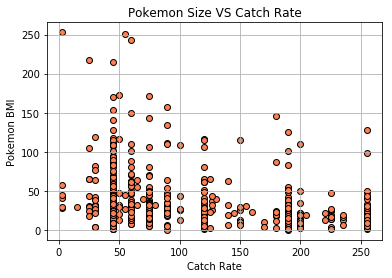

In [14]:
catch_rate = size_table['Catch_Rate']
size_score = size_table['Size_BMI']
plt.scatter(catch_rate, size_score, marker="o", facecolors="coral", edgecolors="black")
plt.title("Pokemon Size VS Catch Rate")
plt.xlabel("Catch Rate")
plt.ylabel("Pokemon BMI")
plt.grid()

In [ ]:
plt.savefig("../Images/size_catchrate.png")
plt.show()